In [11]:
### Tests - we map the values to the [0,1] interval 

In [3]:
from itertools import combinations as comb
## input: 2 lists X and Y of arbitrary length
def adaptedKendallTau(X, Y, similarity=True):
    SI = [x for x in X if x in Y] ## intersection - list to keep the order as in X
    SX = set(X).difference(SI)    ## in X only
    SY = set(Y).difference(SI)    ## in Y only
    tau = 0
    ## SI: pairs in intersection
    l = len(SI)
    y = [Y.index(z) for z in SI]
    s = sum([a<b for a,b in comb(y,2)])
    tau += 2*s - l*(l-1)/2 ## pos-neg pairs a la Kendall-tau.
    ## SX, resp. SY and SI: one element in intersection
    x = [X.index(z) for z in SX]
    y = [Y.index(z) for z in SY]
    i = [X.index(z) for z in SI]
    s = 2*sum([a>b for a in x for b in i]) - len(x)*len(i)
    tau += s
    s = 2*sum([a>b for a in y for b in i]) - len(y)*len(i)
    tau += s
    ## ze rest
    tau -= len(SX)*len(SY)
    tau += l*(l+1)/2
    tau /= (len(X)*len(Y))
    if similarity:
        return (tau+1)/2
    else:
        return tau

In [5]:
X = [1,2,3,4,5]
Y = [2,3,4,1,7,9,12]
Z = ['apple', 'orange']
W = ['orange']
V = [1,2,3,4]
print(adaptedKendallTau(W,Z)) ## 0.5
print(adaptedKendallTau(X,Y)) ## large but < 1
print(adaptedKendallTau(X,Z)) ## 0
print(adaptedKendallTau(X,V)) ## 1


0.5
0.8285714285714285
0.0
1.0


In [10]:
N = 1000

## same top-min(k) --> 1
X = list(range(1,2*N+1,1))
Y = list(range(1,N+1,1))
print(adaptedKendallTau(X,Y))

## second half of top-max(k) --> 0.5
Y = list(range(N+1,2*N+1,1))
print(adaptedKendallTau(X,Y))

## top half equal, bottom half distinct --> 0.75
Y = list(range(1,N+1,1)) + list(range(2*N+1,3*N+1,1))
print(adaptedKendallTau(X,Y))


1.0
0.5
0.75


### We compare 3 cases for varying $k$, $N=1000$

* shuffled lists with $k$ elements in common
* lists with ordered top-$k$ elements in common
* same list with bottom $N-k$ elements shuffles

In [12]:
def Jac(X,Y):
    u = set(X).union(set(Y))
    i = set(X).intersection(set(Y))
    return(len(i)/len(u))

In [18]:
import random
import numpy as np
## lists of length N with k in common, shuffled
N = 1000
mSh = []
sSh = []
p = []
jac = []
X = list(range(1,N+1,1))
Z = list(range(N+1,2*N+1,1))
for k in range(10,N+1,10):
    x = []
    p.append(k/N)
    for l in range(10):
        Y = random.sample(X,k)
        Y.extend(random.sample(Z,1000-k))
        random.shuffle(Y)
        x.append(adaptedKendallTau(X,Y))
    jac.append(Jac(X,Y))
    mSh.append(np.mean(x))
    sSh.append(2*np.sqrt(np.var(x)))


In [14]:
## lists of length N with ordered top-k in common
N = 1000
mOrd = []
sOrd = []
p = []
X = list(range(1,N+1,1))
Z = list(range(N+1,2*N+1,1))
for k in range(10,N+1,10):
    x = []
    p.append(k/N)
    for l in range(10):
        Y = X[0:k]
        Y.extend(random.sample(Z,1000-k))
        x.append(adaptedKendallTau(X,Y))
    mOrd.append(np.mean(x))
    sOrd.append(2*np.sqrt(np.var(x)))


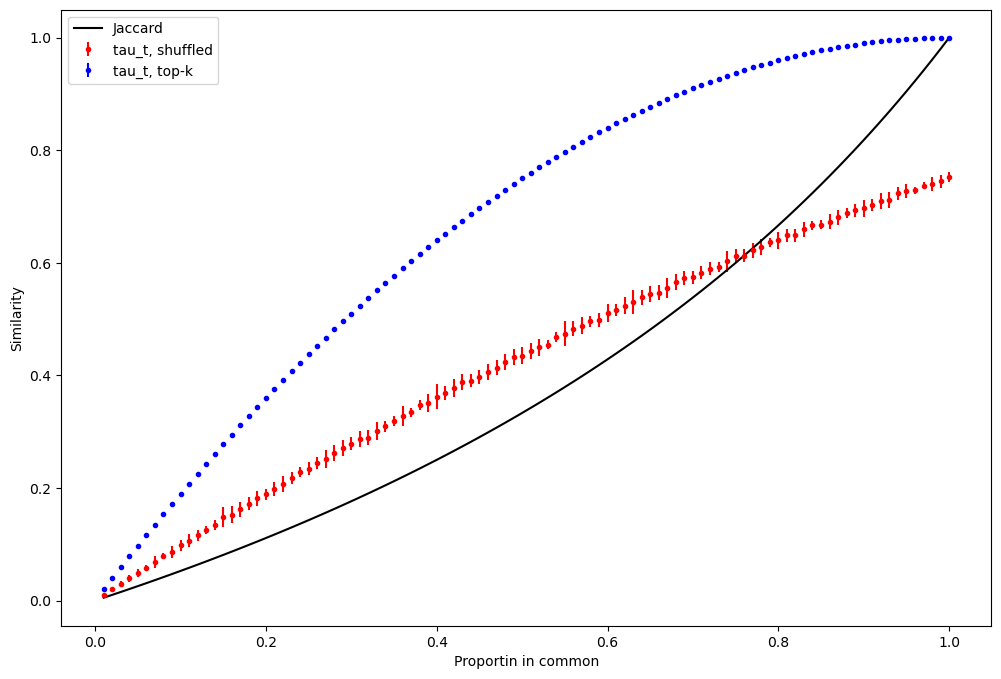

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.errorbar(p,mSh,yerr=sSh,fmt='.',ecolor='red',color='red',label='tau_t, shuffled')
plt.plot(p,jac,label='Jaccard',color='black')
plt.errorbar(p,mOrd,yerr=sOrd,fmt='.',ecolor='blue',color='blue',label='tau_t, top-k')
plt.xlabel('Proportin in common')
plt.ylabel('Similarity')
plt.legend()
plt.show()


In [21]:
## list of length N with ordered top-k in common ??
N = 1000
m = []
s = []
p = []
j = []
X = list(range(1,N+1,1))
for k in range(20,N+1,20):
    x = []
    p.append(k/N)
    for l in range(10):
        Y = X[0:k]
        Z = X[k:N]
        random.shuffle(Z)
        Y.extend(Z)
        x.append(adaptedKendallTau(X,Y))
    j.append(Jac(X,Y))
    m.append(np.mean(x))
    s.append(2*np.sqrt(np.var(x)))


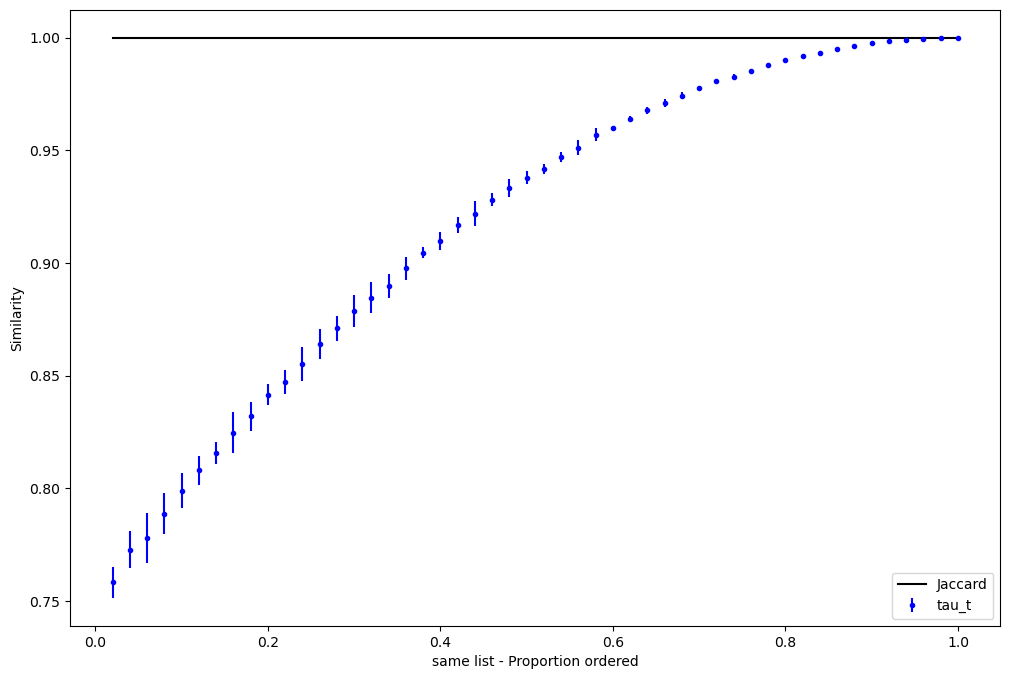

In [22]:
plt.figure(figsize=(12,8))
plt.errorbar(p,m,yerr=s,fmt='.',color='blue',label='tau_t')
plt.plot(p,j,label='Jaccard',color='black')
plt.xlabel('same list - Proportion ordered')
plt.ylabel('Similarity')
plt.legend()
plt.show()
